[0.46427438937084764, 0.3723677272670463, 0.30314113152324146, 0.25045252125689055, 0.20993561820511122, 0.17846153356617694, 0.15376897698581454, 0.13420916756561174, 0.11856899095362505, 0.10594771073072065, 0.09567047525842559, 0.08722721739477578, 0.08022916642561594, 0.07437764514459572, 0.06944149065784691, 0.0652405710548844, 0.061633643803431955, 0.058509331628681244, 0.05577935599045744, 0.05337341993093185, 0.05123530678339869, 0.04931988323743702, 0.04759078100200072, 0.046018591999384476, 0.04457945531115295, 0.04325394522589314, 0.04202619231646663, 0.04088318599582348, 0.03981421919897905, 0.03881044492635057, 0.037864521213089274, 0.03697032626473964, 0.036122729453225755, 0.03531740690973256, 0.034550692808383895, 0.03381945927226902, 0.03312101927376435, 0.03245304803558836, 0.031813519336373955, 0.031200653836928858, 0.030612877110697604, 0.030048785514997792, 0.029507118402235785, 0.02898673546113065, 0.028486598211595996, 0.028005754864861045, 0.027543327911767754, 

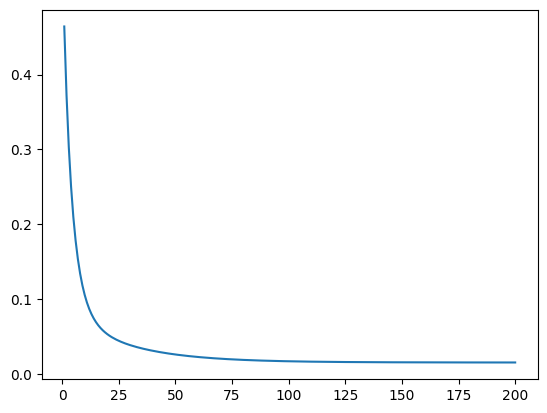

[-0.05907532 -0.06006687 -0.06105841 ...  1.47812855  1.47713701
  1.47614547]


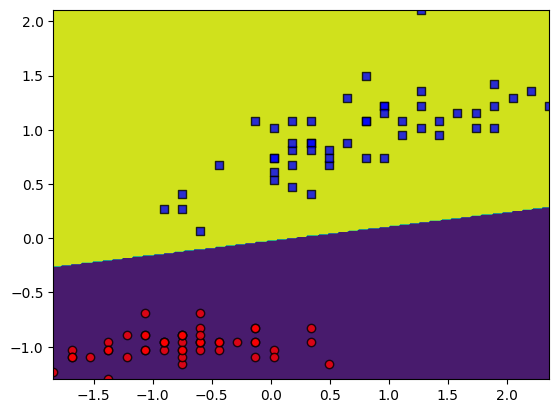

In [9]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from matplotlib.colors import ListedColormap

class AdalineGD:
    def __init__(self , eta=0.1, num_iter=50, random_state=1):
        self.eta = eta
        self.num_iter = num_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.1, size=X.shape[1]) 
        self.b_ = np.float_()

        self.losses_ = []




        for i in range(self.num_iter):
            net_input =  self.net_input(X)
            output =  self.activation(net_input)
            errors = (output - y )


            self.w_ -= self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ -= self.eta * 2.0 * errors.mean()


            loss = (errors ** 2).mean()

            self.losses_.append(loss)

        print(self.losses_)
        return self
    
    def predict(self, X):
        print(self.activation(self.net_input(X)))     

        return np.where(self.activation(self.net_input(X))>= 0.5, 1, 0)

            
    def net_input(self, X):
        return np.dot(X , self.w_) + self.b_

    def activation(self , X):
        return X
    



def plot_decision_regions(X, Y, classifier, n_items=0.02):
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique([1,0]))])
    
    x1_min , x1_max = min(X[:, 0]) , max(X[:,0]) 
    x2_min , x2_max = min(X[:, 1]) , max(X[:,1]) 

    xx1 , xx2 = np.meshgrid( 
        np.linspace(x1_min , x1_max, n_items),
        np.linspace(x2_min , x2_max, n_items)
    )

    lab = classifier.predict(np.array([xx1.ravel() , xx2.ravel()]).T )


    lab = lab.reshape(xx1.shape)


    plt.contourf(xx1, xx2,  lab)


    for idx, cl in enumerate(np.unique(y)):
        XCL = np.array([])
        for id, row  in enumerate(X) :
            if y[id] == cl:
                if len(XCL)==0:
                    XCL= np.array([row])
                else:
                    XCL = np.insert(XCL, len(XCL) , row  , axis=0 )

        

        plt.scatter(x= np.array(XCL[:, 0]),
                    y=np.array(XCL[:, 1]),
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')




    
if __name__=="__main__":
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'


    frame = pd.read_csv(s)

    y =  frame.iloc[0:100, 4].values
    y =  np.where(y == 'Iris-setosa', 0, 1)


    X = frame.iloc[0:100 , [0,2]].values

    X_std =  np.copy(X)
    X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
    X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()


    ppn = AdalineGD(0.05 , 200 , 1)

    ppn.fit(X_std, y)

    plt.plot(range(1 , len(ppn.losses_) + 1), ppn.losses_)
    plt.show()

    plot_decision_regions(X_std, y, ppn , 300)




    